<a href="https://colab.research.google.com/github/quocbaodinhnho/KiemtraTTTTNT/blob/main/Ki%E1%BB%83m_tra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#thuật toán KNN
import numpy as np
from collections import Counter
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    labels = [label for _, label in distances[:k]]
    return Counter(labels).most_common(1)[0][0]

n = int(input("Nhập số điểm huấn luyện: "))
d = int(input("Nhập số chiều: "))
X_train = []
y_train = []
for i in range(n):
    x = list(map(float, input(f"Nhập điểm {i+1} ({d} số): ").split()))
    label = input(f"Nhãn của điểm {i+1}: ")
    X_train.append(x)
    y_train.append(label)
X_train = np.array(X_train)
x_test = np.array(list(map(float, input("Nhập điểm cần phân loại: ").split())))
k = int(input("Nhập k: "))

print("Kết quả KNN:", knn_predict(X_train, y_train, x_test, k))

Nhập số điểm huấn luyện: 4
Nhập số chiều: 3
Nhập điểm 1 (3 số): 1 5 3
Nhãn của điểm 1: 3
Nhập điểm 2 (3 số): 2 3 5
Nhãn của điểm 2: 2
Nhập điểm 3 (3 số): 2 3 6 
Nhãn của điểm 3: 23
Nhập điểm 4 (3 số): 2 5 8
Nhãn của điểm 4: 3 5 4
Nhập điểm cần phân loại: 2 
Nhập k: 5
Kết quả KNN: 2


Nhập số đỉnh: 5
Nhập số cạnh: 0
Nhập các cạnh (u v):

Kết quả tô màu:
Đỉnh 0 → Màu 0
Đỉnh 1 → Màu 0
Đỉnh 2 → Màu 0
Đỉnh 3 → Màu 0
Đỉnh 4 → Màu 0


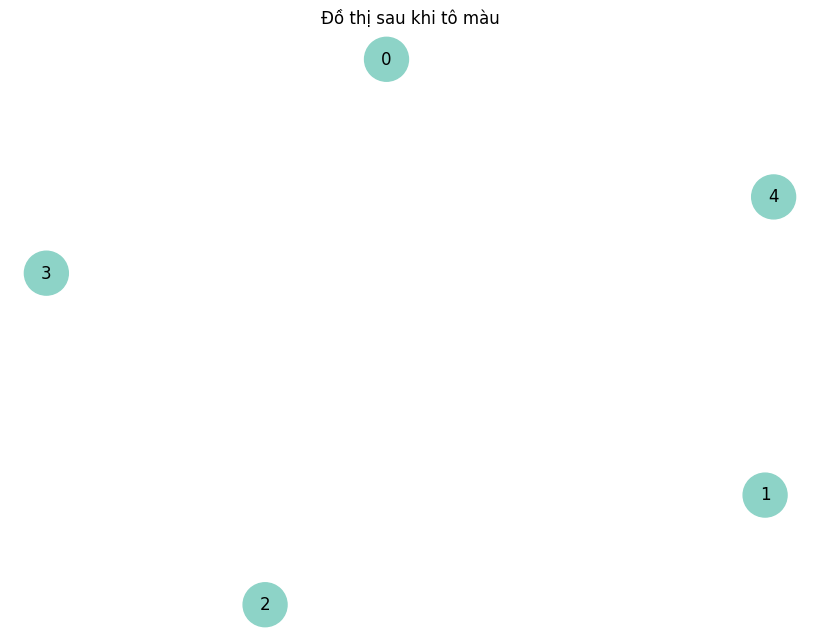

In [6]:
#Thuật toán tô màu
import networkx as nx
import matplotlib.pyplot as plt

# ===== NHẬP DỮ LIỆU =====
n = int(input("Nhập số đỉnh: "))
m = int(input("Nhập số cạnh: "))

G = nx.Graph()
G.add_nodes_from(range(n))

print("Nhập các cạnh (u v):")
for i in range(m):
    u, v = map(int, input(f"Cạnh {i+1}: ").split())
    G.add_edge(u, v)

# ===== THUẬT TOÁN TÔ MÀU (GREEDY) =====
colors = {}

for node in G.nodes():
    used_colors = set(colors.get(neigh) for neigh in G.neighbors(node))

    color = 0
    while color in used_colors:
        color += 1

    colors[node] = color

# ===== HIỂN THỊ KẾT QUẢ =====
print("\nKết quả tô màu:")
for node in colors:
    print(f"Đỉnh {node} → Màu {colors[node]}")

# ===== VẼ ĐỒ THỊ =====
color_list = [colors[node] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=color_list,
    cmap=plt.cm.Set3,
    node_size=1000,
    font_size=12
)
plt.title("Đồ thị sau khi tô màu")
plt.show()

In [9]:
#Thuật toán AKT
class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        px, py = self.find(x), self.find(y)
        if px != py:
            self.parent[py] = px
            return True
        return False

def kruskal(n, edges):
    edges.sort(key=lambda x: x[2])
    ds = DisjointSet(n)
    mst = []
    for u, v, w in edges:
        if ds.union(u, v):
            mst.append((u, v, w))
    return mst

# ===== NHẬP DỮ LIỆU =====
n = int(input("Nhập số đỉnh: "))
m = int(input("Nhập số cạnh: "))

edges = []
for i in range(m):
    u, v, w = map(int, input(f"Cạnh {i+1} (u v w): ").split())
    edges.append((u, v, w))

# ===== KẾT QUẢ =====
mst = kruskal(n, edges)

print("Cây khung nhỏ nhất:")
total = 0
for u, v, w in mst:
    print(u, "-", v, ":", w)
    total += w

print("Tổng trọng số:", total)

KeyboardInterrupt: Interrupted by user